Over the years, the company hasbcollected details and gathered a lot of information about individuals. The management wants to build an intelligent system from the data to determine the presence or absence of smoking in a person through bio signals. Given a person s information, build a machine learning model that can classify the presence or absence of smoking.

In [1]:
'''Dataset

This dataset is a collection of basic health biological signal data which contains around 55 K record with 27 
attributes.


ID- index
gender- gender of a person (M or F)
age- age of a person ( 5 years gap)
height(cm)- height of a person
weight(kg)- weight of a person
waist(cm)- waist circumference length
eyesight(left)- left eyesight
eyesight(right)- right eyesight
hearing(left)- hearing pulse in left ear
hearing(right)- hearing pulse in right ear
systolic- Blood pressure
relaxation- Blood pressure
fasting blood sugar- Blood test
Cholesterol- total
triglyceride- Lipid found in blood
HDL -cholesterol type
LDL- cholesterol type
hemoglobin- Transporting oxygen in blood
Urine protein- Excess of bloodborne proteins in urine 
serum creatinine- Amount of creatinine in blood
AST- glutamic oxaloacetic transaminase type
ALT- glutamic oxaloacetic transaminase type
Gtp- γ GTP
oral- Oral Examination status
dental caries- Tooth decay
tartar- tartar status
smoking- Smoker (0 or 1)'''

'Dataset\n\nThis dataset is a collection of basic health biological signal data which contains around 55 K record with 27 \nattributes.\n\n\nID- index\ngender- gender of a person (M or F)\nage- age of a person ( 5 years gap)\nheight(cm)- height of a person\nweight(kg)- weight of a person\nwaist(cm)- waist circumference length\neyesight(left)- left eyesight\neyesight(right)- right eyesight\nhearing(left)- hearing pulse in left ear\nhearing(right)- hearing pulse in right ear\nsystolic- Blood pressure\nrelaxation- Blood pressure\nfasting blood sugar- Blood test\nCholesterol- total\ntriglyceride- Lipid found in blood\nHDL -cholesterol type\nLDL- cholesterol type\nhemoglobin- Transporting oxygen in blood\nUrine protein- Excess of bloodborne proteins in urine \nserum creatinine- Amount of creatinine in blood\nAST- glutamic oxaloacetic transaminase type\nALT- glutamic oxaloacetic transaminase type\nGtp- γ GTP\noral- Oral Examination status\ndental caries- Tooth decay\ntartar- tartar status\ns

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data and removing the irrelevant columns.

df=pd.read_csv(r"C:\Users\saura\Documents\INTELLIPAT\Projects\Bio signal analysis for smoking\smoking.csv")
df=df.drop(columns=['ID','oral'])
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [4]:
print(df.shape,'\n')           #55692 entries
df.info()                      #Only gender and tartar object type

(55692, 25) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  5

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.004830,9.679278,40.0,70.0,76.0,82.0,146.0


In [6]:
df.isnull().sum().sum() #NO null values

0

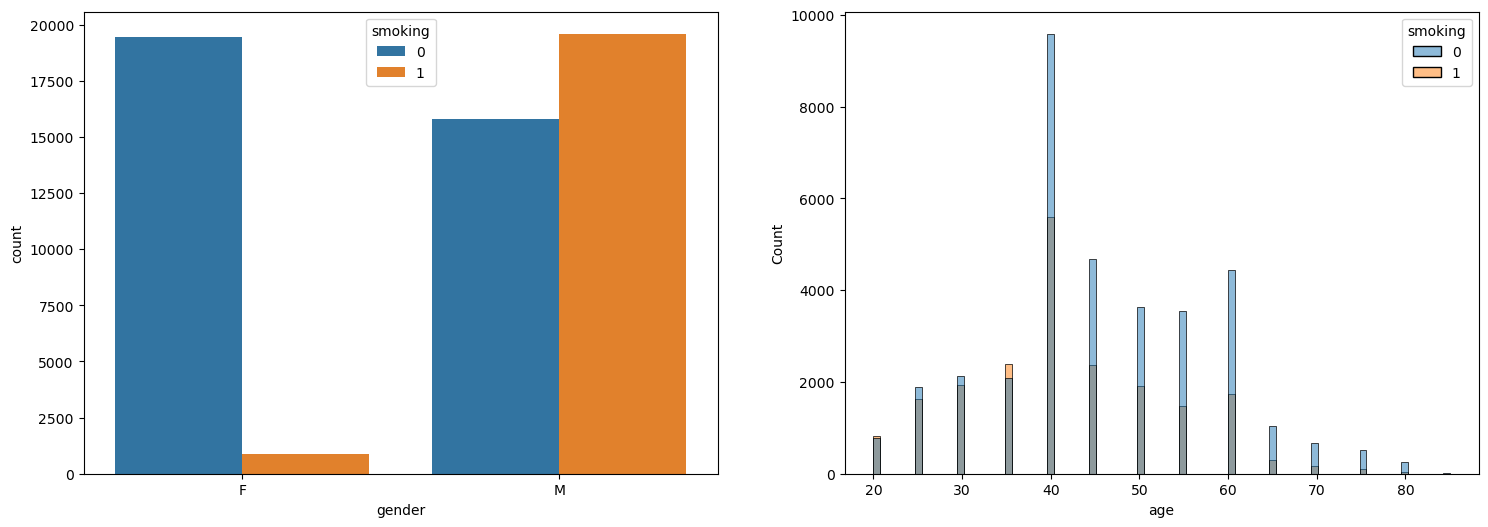

In [21]:
#Data analysis
fig,ax=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x=df['gender'],hue=df['smoking'],ax=ax[0])
sns.histplot(x=df['age'],hue=df['smoking'],ax=ax[1])
plt.show()

#Most smokers are 40 year old men.

In [22]:
#Here outliers represent natural variations in the population ,and they should be left as it is in the dataset. 

In [26]:
#Lable encoding object type features

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['gender']=encode.fit_transform(df['gender'])
df['tartar']=encode.fit_transform(df['tartar'])
df['dental caries']=encode.fit_transform(df['dental caries'])

In [32]:
#Seperating independent and dependent features

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
#Train-test split data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
#Importing model evaluation metrics

from sklearn.metrics import *

In [43]:
#Logistic regression & its accuracy

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)
y_pred_LR=LR.predict(x_test)
print('Accuracy of Linear Regression : ',round(accuracy_score(y_pred_LR,y_test)*100,2),'%','\n')
print('Classification report : ','\n',classification_report(y_pred_LR,y_test))

Accuracy of Linear Regression :  71.86 % 

Classification report :  
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      7728
           1       0.53      0.64      0.58      3411

    accuracy                           0.72     11139
   macro avg       0.68      0.70      0.68     11139
weighted avg       0.74      0.72      0.72     11139



c:\Users\saura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#Decision Tree & its accuracy

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

DT.fit(x_train,y_train)
y_pred_DT=DT.predict(x_test)
print('Accuracy of Decision Tree : ',round(accuracy_score(y_pred_DT,y_test)*100,2),'%','\n')
print('Classification report : ','\n',classification_report(y_pred_DT,y_test))

Accuracy of Decision Tree :  78.46 % 

Classification report :  
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      7045
           1       0.71      0.70      0.71      4094

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



In [45]:
#Random forest & its accuracy

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

RF.fit(x_train,y_train)
y_pred_RF=RF.predict(x_test)
print('Accuracy of Random Forest : ',round(accuracy_score(y_pred_RF,y_test)*100,2),'%','\n')
print('Classification report : ','\n',classification_report(y_pred_RF,y_test))

Accuracy of Random Forest :  83.66 % 

Classification report :  
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6892
           1       0.80      0.76      0.78      4247

    accuracy                           0.84     11139
   macro avg       0.83      0.82      0.83     11139
weighted avg       0.84      0.84      0.84     11139



In [46]:
#Extra trees & its accuracy

from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()

ET.fit(x_train,y_train)
y_pred_ET=ET.predict(x_test)
print('Accuracy of Extra trees : ',round(accuracy_score(y_pred_ET,y_test)*100,2),'%','\n')
print('Classification report : ','\n',classification_report(y_pred_ET,y_test))

Accuracy of Extra trees :  83.05 % 

Classification report :  
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      6798
           1       0.80      0.75      0.78      4341

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [52]:
#SVM & its accuracy

from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)
print('Accuracy of SVC : ',round(accuracy_score(y_pred_svc,y_test)*100,2),'%','\n')
print('Classification report : ','\n',classification_report(y_pred_svc,y_test))

Accuracy of SVC :  73.49 % 

Classification report :  
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      7807
           1       0.55      0.67      0.60      3332

    accuracy                           0.73     11139
   macro avg       0.69      0.72      0.70     11139
weighted avg       0.75      0.73      0.74     11139



In [51]:
#Bagging classifier 
#involves taking multiple samples from the training dataset (with replacement) and training a model for each
#selecting base estimator as Decision tree

from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)

BC.fit(x_train,y_train).score(x_test,y_test)
y_pred_BC=BC.predict(x_test)
print('Accuracy of Random forest with bagging : ',round(accuracy_score(y_pred_BC,y_test)*100,2),'%','\n')
print('Classification report : ','\n',classification_report(y_pred_BC,y_test))

c:\Users\saura\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Random forest with bagging :  83.7 % 

Classification report :  
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6848
           1       0.80      0.76      0.78      4291

    accuracy                           0.84     11139
   macro avg       0.83      0.82      0.83     11139
weighted avg       0.84      0.84      0.84     11139



Decision Tree with bagging gives accuracy of 84% same as Random forest classifier.